# Outlier

In [ ]:
# data range er baire jay..
#boxplot er maddhome dekha jay
# outlier noise create kore
# wrong ans ashe

In [ ]:
# otlier kivabe detect korbo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('loan.csv')

In [ ]:
df.shape

(614, 13)

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# ApplicantIncome and CoapplicantIncome e min and max er moddhe difference onnk beshi
# so edr otlier thakar chance onk beshi
# abr mean er thekeo max value onk beshi so outlier howar possibolities ache
# boxplot*** or distribution plot er maddhome dekhte pari j outlier ache kina

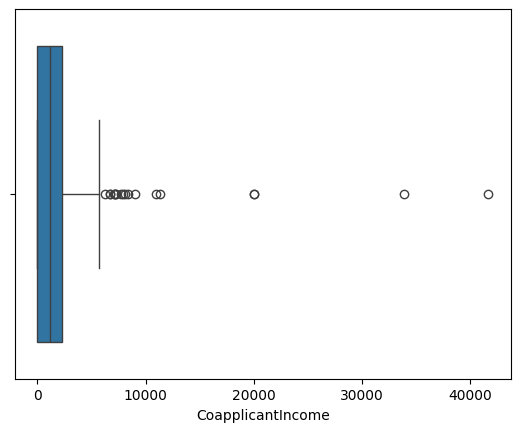

In [ ]:
sns.boxplot(x = "CoapplicantIncome",data = df)
plt.show()

In [ ]:
# ekhane onkgula outlier ache

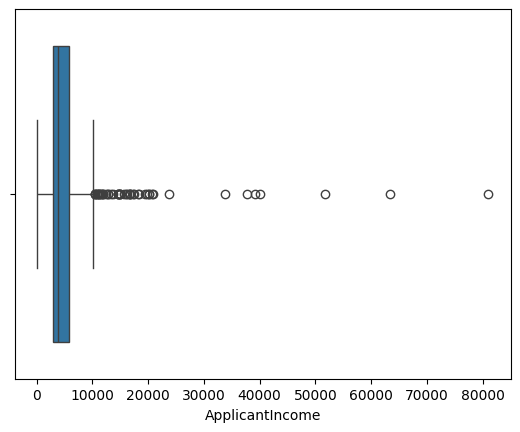

In [ ]:
sns.boxplot(x = "ApplicantIncome",data = df)
plt.show()

# Distribution Plot

<ipython-input-106-eb51cfa0b131>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ApplicantIncome"])


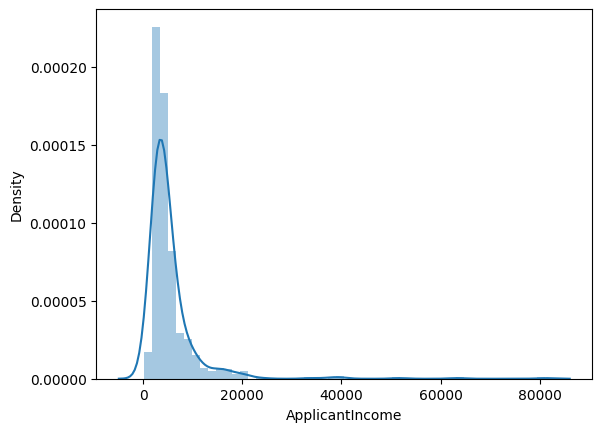

In [ ]:
# boxplot use kora beshi valo.. But distribution plot er maddhome kivabe outlier detect kore
sns.distplot(df["ApplicantIncome"])
plt.show()

In [ ]:
# etar tail onnk lomba er mane ekhane outlier ache. karon er tail oonk beshi lomba


In [ ]:
l = [5,6,7,3,5,6,4,1]

In [ ]:
avg = sum(l)/len(l)
avg

4.625

In [ ]:
l1 = [5,6,7,3,5,6,4,1,100]

In [ ]:
avg = sum(l1)/len(l1) # onk beshi avg value ashche outlier er jnno
avg

15.222222222222221

# Outlier remove method

In [ ]:
# 2 vabe outlier remove kora jay
# 1. IQR  2. Z-score
# IQR: Inter quantile range (Q3-Q1)

# IQR

In [ ]:
# Q3 = 75% , Q1 = 25%
# so, IQR = Q3 - Q1

In [ ]:
df.shape

(614, 13)

In [ ]:
# 1st quantile, 3rd quantile
q1 = df["CoapplicantIncome"].quantile(0.25)
q1

0.0

In [ ]:
q3 = df["CoapplicantIncome"].quantile(0.75)
q3

2297.25

In [ ]:
IQR = q3 - q1
IQR

2297.25

In [ ]:
min_range = q1 - (1.5*IQR)
min_range

-3445.875

In [ ]:
max_range = q3 + (1.5*IQR)
max_range

5743.125

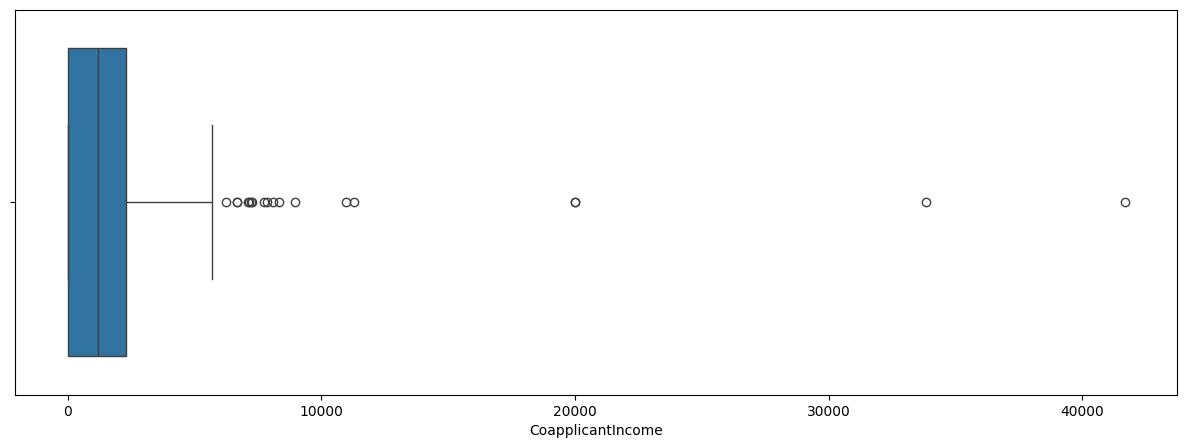

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "CoapplicantIncome",data = df)
plt.show()

In [ ]:
# original data theke otlier remove korbo
df[df["CoapplicantIncome"]<=max_range]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
new_df = df[df["CoapplicantIncome"]<=max_range]

In [ ]:
new_df.shape

(596, 13)

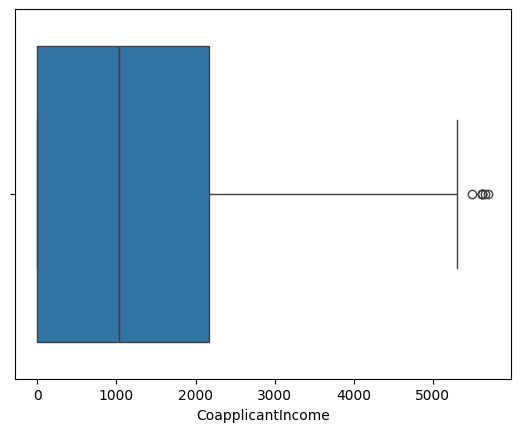

In [ ]:
sns.boxplot(x = "CoapplicantIncome",data = new_df)
plt.show()

In [ ]:
#otlier remove hoise. but minimal outlier ache. so outlier komale data loss hy
# so, ei minimal outlier amra baad dibo na




```
# This is formatted as code
```

# Z-score

In [ ]:
# z = x(old data) - mean / standard deviation

In [ ]:
# min range = mean - 3standard deviation
# max range = mean + 3standard deviation

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('loan.csv')

In [ ]:
df.shape

(614, 13)

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
#check korbo null value ache kina
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='CoapplicantIncome'>

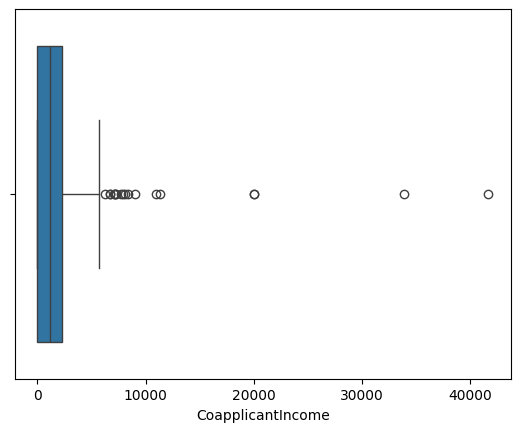

In [ ]:
sns.boxplot(x = "CoapplicantIncome",data=df)

<ipython-input-136-a57b2740f2e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

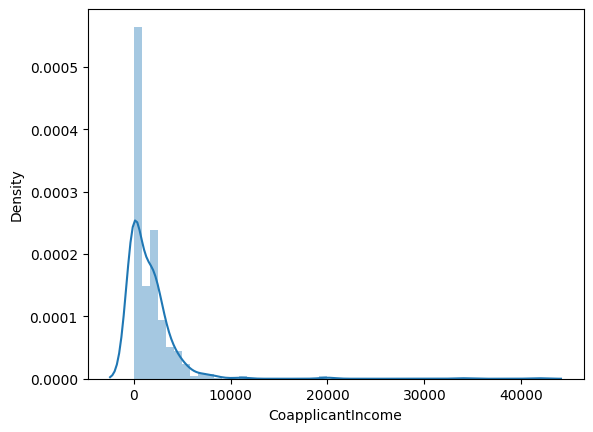

In [ ]:
sns.distplot(df["CoapplicantIncome"])

In [ ]:
# Direct method
min_range = df["CoapplicantIncome"].mean()-(3*df["CoapplicantIncome"].std())
max_range = df["CoapplicantIncome"].mean()+(3*df["CoapplicantIncome"].std())

In [ ]:
min_range, max_range

(-7157.4993096454655, 10399.990905699668)

In [ ]:
df[df["CoapplicantIncome"]<=max_range]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
new_data = df[df["CoapplicantIncome"]<=max_range]

<Axes: xlabel='CoapplicantIncome'>

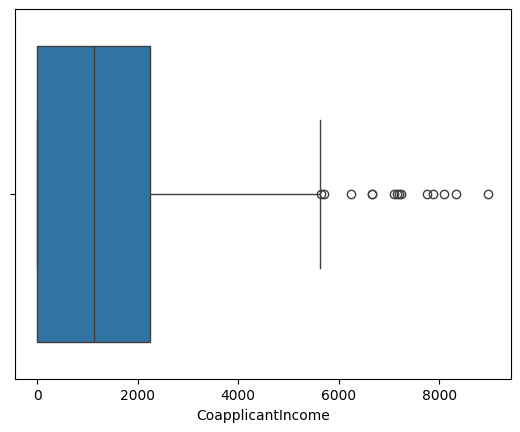

In [ ]:
sns.boxplot(x = "CoapplicantIncome",data=new_data)

In [ ]:
# beshi outlier remove korle data loss hy beshi. so emn hote pare j kono imp feature ache kina

In [ ]:
# z - score
z_score = ((df["CoapplicantIncome"] - df["CoapplicantIncome"].mean())/df["CoapplicantIncome"].std())

In [ ]:
z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [ ]:
z_score>3

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: CoapplicantIncome, Length: 614, dtype: bool

In [ ]:
# z_score > 3 comparison
# data set er vitor eta replace korbo
df["z_score"] = z_score

In [ ]:
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [ ]:
df[df["z_score"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [ ]:
df.shape

(614, 14)

In [ ]:
# https://colab.research.google.com/drive/1gL1bCeWW4Z-SvcGzij7f-IVuqwcwIMbj?usp=sharing